In [51]:
 import pandas as pd

In [52]:
data=pd.read_csv('C:/Users/Manikanta/Machine learning/CSV Files/salaries.csv')

In [53]:
data.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [54]:
data.shape

(16, 4)

In [55]:
len(data)

16

In [56]:
inputs=data.drop('salary_more_then_100k',axis="columns")
target=data.salary_more_then_100k

In [57]:
inputs.head()

company                  job     degree
0  google      sales executive  bachelors
1  google      sales executive    masters
2  google     business manager  bachelors
3  google     business manager    masters
4  google  computer programmer  bachelors

In [58]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [35]:
from sklearn.compose import ColumnTransformer

In [36]:
ct=ColumnTransformer(transformers=[
    ("ct1",LabelEncoder(),["company"]),
    ("ct2",LabelEncoder(),["job"]),
    ("ct3",LabelEncoder(),["degree"])
                                  ],remainder="passthrough")

In [37]:
ct.fit_transform(inputs)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [38]:
"""
LabelEncoder was specially designed for encoding the target variable - y. 
That's why you can't use it to transform multiple columns at the same time as with OneHotEncoder.

Sklearn provides OrdinalEncoder for such circumstances. It can encode multiple columns at once when encoding features.

OneHotEncoder can take a dataframe and convert the categorical columns into the vectors you see. 

LabelEncoder takes a Series(your y / dependent variable) and generates new labels.

"""

"\nLabelEncoder was specially designed for encoding the target variable - y. \nThat's why you can't use it to transform multiple columns at the same time as with OneHotEncoder.\n\nSklearn provides OrdinalEncoder for such circumstances. It can encode multiple columns at once when encoding features.\n\nOneHotEncoder can take a dataframe and convert the categorical columns into the vectors you see. \n\nLabelEncoder takes a Series(your y / dependent variable) and generates new labels.\n\n"

In [22]:
ct=ColumnTransformer(transformers=[
    ("ct1",OrdinalEncoder(),["company"]),
    ("ct2",OrdinalEncoder(),["job"]),
    ("ct3",OrdinalEncoder(),["degree"])
                                  ],remainder="passthrough")

In [23]:
ct.fit_transform(inputs)

array([[2., 2., 0.],
       [2., 2., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 1., 0.],
       [2., 1., 1.],
       [0., 2., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 2., 0.],
       [1., 2., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [59]:
ct=ColumnTransformer(transformers=[
    ("ct1",OrdinalEncoder(),["company","job","degree"]),
                                  ],remainder="passthrough")

In [60]:
inputs=ct.fit_transform(inputs)
inputs

array([[2., 2., 0.],
       [2., 2., 1.],
       [2., 0., 0.],
       [2., 0., 1.],
       [2., 1., 0.],
       [2., 1., 1.],
       [0., 2., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 1.],
       [1., 2., 0.],
       [1., 2., 1.],
       [1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [62]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [65]:
new_inputs=pd.DataFrame({"company":inputs[:,0],"job":inputs[:,1],"degree":inputs[:,2]})
new_inputs

company  job  degree
0       2.0  2.0     0.0
1       2.0  2.0     1.0
2       2.0  0.0     0.0
3       2.0  0.0     1.0
4       2.0  1.0     0.0
5       2.0  1.0     1.0
6       0.0  2.0     1.0
7       0.0  1.0     0.0
8       0.0  0.0     0.0
9       0.0  0.0     1.0
10      1.0  2.0     0.0
11      1.0  2.0     1.0
12      1.0  0.0     0.0
13      1.0  0.0     1.0
14      1.0  1.0     0.0
15      1.0  1.0     1.0

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(new_inputs,target,test_size=0.33,random_state=42)

In [71]:
X_train.shape,y_train.shape

((10, 3), (10,))

In [72]:
X_test.shape,y_test.shape

((6, 3), (6,))

In [73]:
model=DecisionTreeClassifier()

In [74]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1], dtype=int64)

In [79]:
model.score(X_test,y_test)

0.8333333333333334

In [80]:
from sklearn.metrics import confusion_matrix

In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2, 0],
       [1, 3]], dtype=int64)

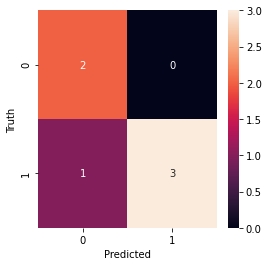

In [85]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

### exercise

In [197]:
"""
In this file using following columns build a model to predict if person would survive or not,
Pclass

1) Sex
2) Age
3) Fare

Calculate score of your model

"""

'\nIn this file using following columns build a model to predict if person would survive or not,\nPclass\n\n1) Sex\n2) Age\n3) Fare\n\nCalculate score of your model\n\n'

In [198]:
df=pd.read_csv('C:/Users/Manikanta/Machine learning/CSV Files/titanic.csv')

In [199]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [200]:
df.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],inplace=True)

In [201]:
df.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [202]:
df.shape

(891, 5)

<IPython.core.display.Javascript object>


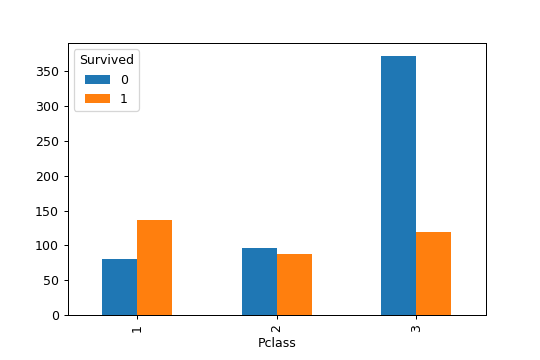

<AxesSubplot:xlabel='Pclass'>

In [203]:
pd.crosstab(df.Pclass,df.Survived).plot(kind="bar")

In [204]:
pd.crosstab(df.Sex,df.Survived,margins="All")

Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

<IPython.core.display.Javascript object>


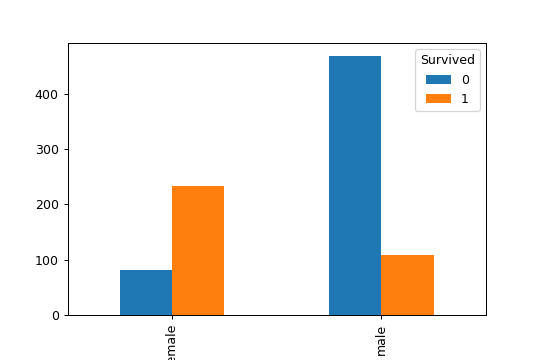

<AxesSubplot:xlabel='Sex'>

In [205]:
pd.crosstab(df.Sex,df.Survived).plot(kind="bar")

In [206]:
df.groupby("Survived").mean()

Pclass        Age       Fare
Survived                                
0         2.531876  30.626179  22.117887
1         1.950292  28.343690  48.395408

In [207]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [208]:
inputs.head()

Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500

In [209]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [210]:
inputs.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [211]:
inputs.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [212]:
# inputs.Age=inputs.Age.fillna(inputs.Age.mean())

In [213]:
from sklearn.impute import SimpleImputer

In [214]:
si=SimpleImputer(strategy="mean")

In [215]:
inputs.Age=si.fit_transform([inputs.Age])

ValueError: Length of values (1) does not match length of index (891)

In [216]:
np.array(inputs['Age'])

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [217]:
np.array(inputs['Age']).ndim

1

In [218]:
len(np.array(inputs['Age']))

891

In [219]:
inputs['Age'].values.reshape(-1,1)

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [220]:
inputs['Age'].values.reshape(-1,1).ndim

2

In [221]:
[inputs['Age']]

[0      22.0
 1      38.0
 2      26.0
 3      35.0
 4      35.0
        ... 
 886    27.0
 887    19.0
 888     NaN
 889    26.0
 890    32.0
 Name: Age, Length: 891, dtype: float64]

In [222]:
len(inputs['Age'].values.reshape(-1,1))

891

In [223]:
len([inputs['Age']])

1

In [224]:
import numpy as np

In [225]:
si=SimpleImputer(strategy="mean",missing_values=np.nan)

In [226]:
inputs.Age=si.fit_transform(inputs['Age'].values.reshape(-1,1))

In [227]:
inputs.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [228]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target,test_size=0.33,random_state=42)

In [229]:
x_train.shape,y_train.shape

((596, 4), (596,))

In [230]:
x_test.shape,y_test.shape

((295, 4), (295,))

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dtc=DecisionTreeClassifier()

In [233]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [234]:
y_pred=dtc.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [235]:
dtc.score(x_test,y_test)

0.752542372881356

In [236]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[144,  31],
       [ 42,  78]], dtype=int64)

<IPython.core.display.Javascript object>


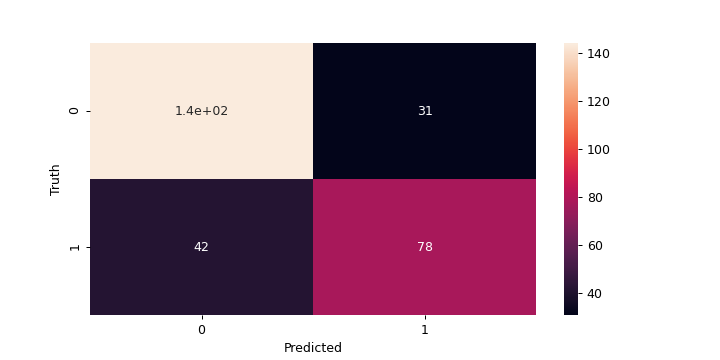

In [237]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(8,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [238]:
# in decision tree algorithm we have entropy and information_gain

In [239]:
# entropy means measure of randomness 

In [240]:
# entropy is inversely proportional to information_gainabs

In [241]:
# based on entropy we decide which column is at the top

In [242]:
from sklearn import tree

<IPython.core.display.Javascript object>


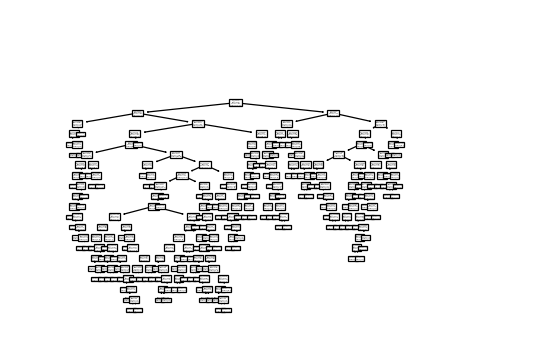

In [192]:
%matplotlib inline
%matplotlib notebook
tree.plot_tree(dtc)
plt.show()

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


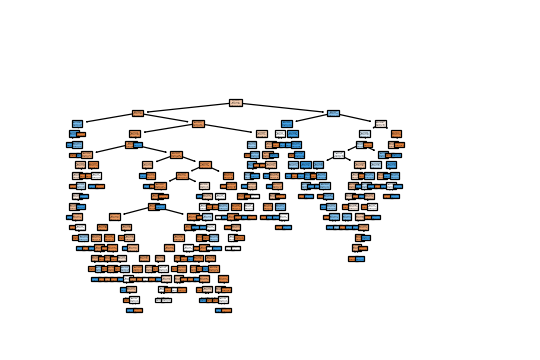

In [193]:
%matplotlib
tree.plot_tree(dtc,filled=True)
plt.show()

In [251]:
len([df.Pclass])

1

In [252]:
[df.Pclass]

[0      3
 1      1
 2      3
 3      1
 4      3
       ..
 886    2
 887    1
 888    3
 889    1
 890    3
 Name: Pclass, Length: 891, dtype: int64]

In [253]:
len(df.Pclass)

891